In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [45]:
df = pd.read_csv("C:\Abhinav\Test\Datasets\AML\program_5_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\abhin\AppData\Local\Temp\ipykernel_25804\1275221411.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Abhinav\Test\Datasets\AML\program_5_dataset.csv")


In [46]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [47]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [48]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [49]:
# Assuming df is your DataFrame
columns_with_null = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Replace missing values with the mean of each column
for column in columns_with_null:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

**Simple Linear Regression Model**

In [50]:
x_sl = df[['CREA']]
y_sl = df['PROT']

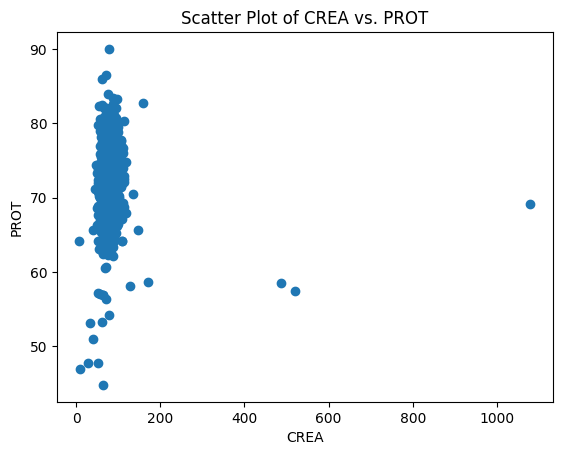

In [51]:
plt.scatter(x_sl, y_sl)
plt.title('Scatter Plot of CREA vs. PROT')
plt.xlabel('CREA')
plt.ylabel('PROT')
plt.show()

In [52]:
x_sl_train, x_sl_test, y_sl_train, y_sl_test = train_test_split(x_sl, y_sl, test_size=0.2, random_state=14)

In [53]:
sl_model = LinearRegression()
sl_model.fit(x_sl_train, y_sl_train)

LinearRegression()

In [54]:
print('Co-efficients: ', sl_model.coef_)
print('Intercept: ', sl_model.intercept_)

Co-efficients:  [0.00486806]
Intercept:  71.57596682566758


In [55]:
y_sl_train_pred = sl_model.predict(x_sl_train)
mse_sl_train = mean_squared_error(y_sl_train, y_sl_train_pred)
r2_sl_score = r2_score(y_sl_train, y_sl_train_pred)
print("Mean Sqaured Error(Train): ", mse_sl_train)
print("R-sqaured(Train): ", r2_sl_score)

y_sl_test_pred = sl_model.predict(x_sl_test)
mse_sl_test = mean_squared_error(y_sl_test, y_sl_test_pred)
r2_sl_test = r2_score(y_sl_test, y_sl_test_pred)
print("Mean Sqaured Error(Test): ", mse_sl_test)
print("R-Squared(Test): ", r2_sl_test)

Mean Sqaured Error(Train):  28.767306934104422
R-sqaured(Train):  0.0018946369713827016
Mean Sqaured Error(Test):  31.136841319472605
R-Squared(Test):  -0.03601843619166423


**Multiple Linear Regression Model**

In [56]:
preds = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']
target = ['PROT']
x_mlr = df[preds]
y_mlr = df[target]

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(x):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data


In [59]:
vif_results = calc_vif(x_mlr)
print(vif_results)

  Variable        VIF
0      ALB  30.939391
1      ALP   9.894721
2      ALT   2.671327
3      AST   3.103881
4      BIL   1.572421
5      CHE  22.129342
6     CHOL  26.864335
7     CREA   3.746091
8      GGT   2.600775


In [60]:
final_preds = ['BIL','GGT']
x_fin_mlr = df[final_preds]
y_fin_mlr = y_mlr

In [61]:
x_mlr_train, x_mlr_test, y_train_mlr, y_test_mlr = train_test_split(x_fin_mlr, y_fin_mlr, test_size=0.2, random_state=14)

In [62]:
mlr_model = LinearRegression()
mlr_model.fit(x_fin_mlr, y_fin_mlr)

LinearRegression()

In [63]:
print('Coefficients: ', mlr_model.coef_)
print('Intercept: ', mlr_model.intercept_)

Coefficients:  [[-0.01116189 -0.00028712]]
Intercept:  [72.18269688]


In [64]:
y_mlr_train_pred = mlr_model.predict(x_mlr_train)
mse_mlr_train = mean_squared_error(y_train_mlr, y_mlr_train_pred)
r2_mlr_train = r2_score(y_train_mlr, y_mlr_train_pred)
print("Mean Sqaured Error(Train): ", mse_mlr_train)
print("R-Squared(Train): ", r2_mlr_train)

y_mlr_test_pred = mlr_model.predict(x_mlr_test)
mse_mlr_test = mean_squared_error(y_test_mlr, y_mlr_test_pred)
r2_mlr_test = r2_score(y_test_mlr, y_mlr_test_pred)
print("Mean Sqaured Error(Test): ", mse_mlr_test)
print("R-Sqaured(Test): ", r2_mlr_test)

Mean Sqaured Error(Train):  28.785190289842962
R-Squared(Train):  0.0012741592425332682
Mean Sqaured Error(Test):  30.077591465308608
R-Sqaured(Test):  -0.0007739370407202628


**Polynomial Regression Model**

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
x_poly = df['ALB']
y_poly = df['PROT']

In [67]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y_poly, test_size=0.2, random_state=14)

In [68]:
x_poly_train_reshaped = x_poly_train.values.reshape(-1,1)
x_poly_test_reshaped = x_poly_test.values.reshape(-1,1)

In [69]:
degrees = [2,3,4]

for degree in degrees:
    poly=PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(x_poly_train_reshaped)
    x_poly_test = poly.fit_transform(x_poly_test_reshaped)
    
    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y_poly_train)
    y_poly_pred = poly_model.predict(x_poly_test)
    
    poly_r2 = r2_score(y_poly_test, y_poly_pred)
    poly_mse = mean_squared_error(y_poly_test, y_poly_pred)
    
    print(f"Polynomial Regression Results (Degree {degree}):")
    print("R-Squared: ", poly_r2)
    print("Mean Squared Error: ", poly_mse)

Polynomial Regression Results (Degree 2):
R-Squared:  0.3054144824082148
Mean Squared Error:  20.87530326541227
Polynomial Regression Results (Degree 3):
R-Squared:  0.2983148505489178
Mean Squared Error:  21.088677953455665
Polynomial Regression Results (Degree 4):
R-Squared:  0.29455583784041806
Mean Squared Error:  21.201652566776914


**Ridge Regression Model**

In [70]:
x_ridge = df['ALB']
y_ridge = df['PROT']

In [71]:
x_ridge_train, x_ridge_test, y_ridge_train, y_ridge_test = train_test_split(x_ridge, y_ridge, test_size=0.2, random_state=14)

In [72]:
x_ridge_train_reshaped = x_ridge_train.values.reshape(-1,1)
x_ridge_test_reshaped = x_ridge_test.values.reshape(-1,1)

In [73]:
alpha_values = np.linspace(0.1, 150, 13)
ridge_mse = []
ridge_r2 = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_ridge_train_reshaped, y_ridge_train)
    y_ridge_pred = ridge_model.predict(x_ridge_test_reshaped)
    
    mse_ridge = mean_squared_error(y_ridge_test, y_ridge_pred)
    ridge_mse.append(mse_ridge)
    r2_ridge = r2_score(y_ridge_test, y_ridge_pred)
    ridge_r2.append(r2_ridge)

In [74]:
print("Mean Squared Error for Ridge Regression Model: ", ridge_mse)
print("R-squared for Ridge Regression Model: ", ridge_r2)

Mean Squared Error for Ridge Regression Model:  [20.030563047108856, 20.033284535533152, 20.036008838329074, 20.038735934694593, 20.041465803930432, 20.04419842543955, 20.04693377872658, 20.04967184339735, 20.052412599158284, 20.055156025816032, 20.057902103276835, 20.060650811546033, 20.063402130727635]
R-squared for Ridge Regression Model:  [0.33352158649675934, 0.3334310342100798, 0.33334038828060397, 0.3332496494004794, 0.3331588182584344, 0.333067895539796, 0.3329768819265079, 0.33288577809714726, 0.33279458472694323, 0.332703302487791, 0.3326119320482719, 0.33252047407366925, 0.3324289292259841]


In [75]:
print('Intercept: ', ridge_model.intercept_)
print('Coefficients: ', ridge_model.coef_)

Intercept:  51.73197850459003
Coefficients:  [0.48692717]


**Lasso Regression Model**

In [76]:
x_lass = df['ALB']
y_lass = df['PROT']

In [77]:
x_lass_train, x_lass_test, y_lass_train, y_lass_test = train_test_split(x_lass, y_lass, test_size=0.2, random_state=14)

In [78]:
x_lass_train_reshaped = x_lass_train.values.reshape(-1,1)
x_lass_test_reshaped = x_lass_test.values.reshape(-1,1)

In [79]:
alpha_values_lass = np.linspace(0.1, 100, 10)
lass_mse = []
lass_r2 = []

for alpha_lasso in alpha_values_lass:
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(x_lass_train_reshaped, y_lass_train)
    y_lass_pred = lasso_model.predict(x_lass_test_reshaped)
    
    mse_lass = mean_squared_error(y_lass_test, y_lass_pred)
    lass_mse.append(mse_lass)
    r2_lass = r2_score(y_lass_test, y_lass_pred)
    lass_r2.append(r2_lass)

In [80]:
print("Mean Squared Error (Lasso Regression Model)", lass_mse)
print("R-squared for Lasso Regression Model: ", lass_r2)

Mean Squared Error (Lasso Regression Model) [20.052571035196383, 25.210054777680337, 30.211541213530158, 30.211541213530158, 30.211541213530158, 30.211541213530158, 30.211541213530158, 30.211541213530158, 30.211541213530158, 30.211541213530158]
R-squared for Lasso Regression Model:  [0.3327893130728681, 0.1611839730594431, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698, -0.005230856972221698]


In [81]:
print('Intercept: ', lasso_model.intercept_)
print('Coefficients: ', lasso_model.coef_)

Intercept:  71.96483739837397
Coefficients:  [0.]


**n-fold Cross-validation**

In [82]:
nfolds = 5
ridge_cv_scores = cross_val_score(ridge_model, x_ridge_train_reshaped, y_ridge_train, cv=nfolds, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_model, x_lass_train_reshaped, y_lass_train, cv=nfolds, scoring='neg_mean_squared_error')

print("Cross Validation Scores for Ridge regression: ",ridge_cv_scores)
print("Cross Validation Scores for Lasso Regression: ",lasso_cv_scores)

Cross Validation Scores for Ridge regression:  [-25.00177335 -25.66450817 -16.31172209 -19.22896666 -18.81728876]
Cross Validation Scores for Lasso Regression:  [-26.08552306 -41.77841861 -21.39870842 -27.13710348 -28.08371534]


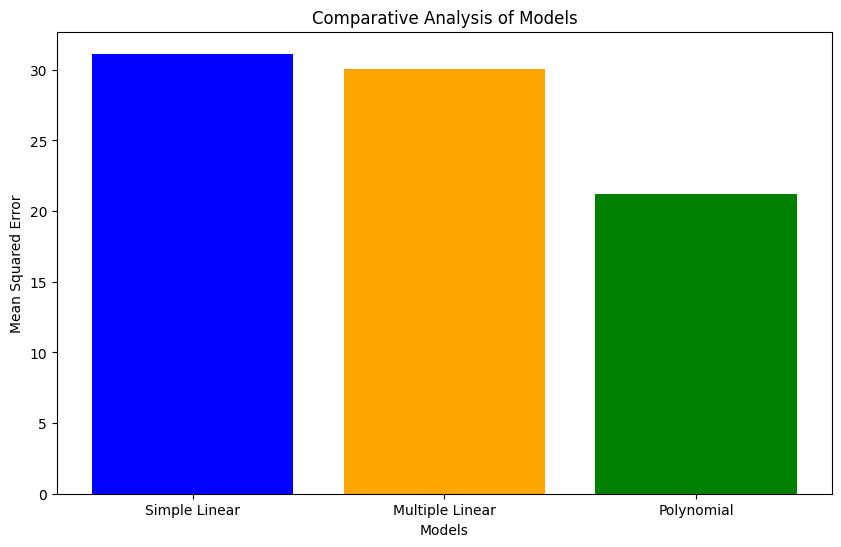

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(['Simple Linear', 'Multiple Linear', 'Polynomial'], [mse_sl_test, mse_mlr_test, poly_mse], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparative Analysis of Models')
plt.show()

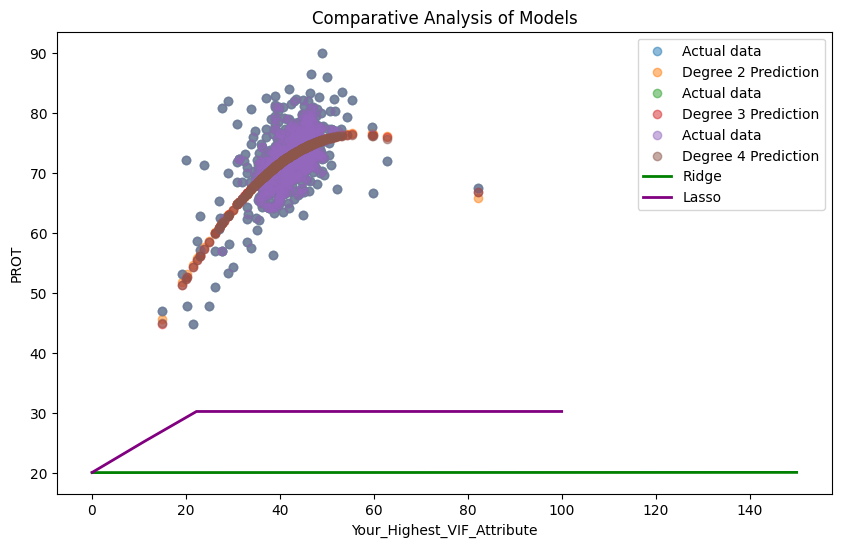

In [84]:
plt.figure(figsize=(10, 6))

# Simple Linear, Multiple Linear, and Polynomial
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['ALB']])
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, df['PROT'], test_size=0.2, random_state=42)
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train_poly)

    plt.scatter(df[['ALB']], df['PROT'], label='Actual data', alpha=0.5)
    plt.scatter(df[['ALB']], model_poly.predict(X_poly), label=f'Degree {degree} Prediction', alpha=0.5)

# Ridge
plt.plot(alpha_values, ridge_mse, label='Ridge', color='green', linewidth=2)

# Lasso
plt.plot(alpha_values_lass, lass_mse, label='Lasso', color='purple', linewidth=2)

# Labels and legend
plt.title('Comparative Analysis of Models')
plt.xlabel('Your_Highest_VIF_Attribute')
plt.ylabel('PROT')
plt.legend()

# Display the plot
plt.show()

In [86]:
np.linspace(0.1, 150, 13)

array([1.00000000e-01, 1.25916667e+01, 2.50833333e+01, 3.75750000e+01,
       5.00666667e+01, 6.25583333e+01, 7.50500000e+01, 8.75416667e+01,
       1.00033333e+02, 1.12525000e+02, 1.25016667e+02, 1.37508333e+02,
       1.50000000e+02])